In [1]:
import numpy as np
import torch
from environment import Floor1
from fcn_resnet import FCQResNet as FCQNet
from fc_dqn import get_action

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
model_path = "results/models/FCDQN_1009_2114.pth"

FCQ = FCQNet(1, 1).cuda()
FCQ.load_state_dict(torch.load(model_path))
FCQ.eval()
env = Floor1(resolution=64, box_norm=True, action_norm=False, block_size_min=0.1, block_size_max=0.25)

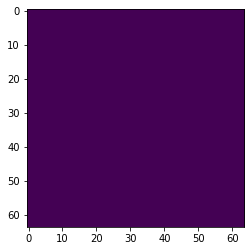

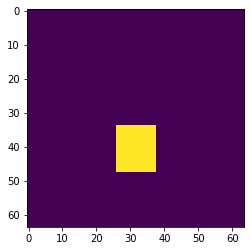

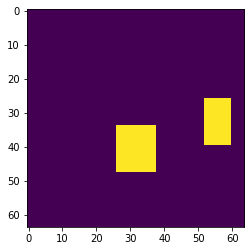

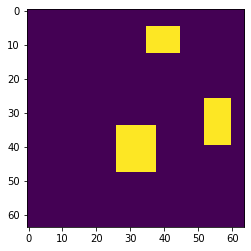

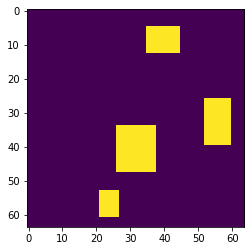

In [7]:
obs = env.reset()
state, block = obs
state = state[np.newaxis, :, :]

for t_step in range(5):
    plt.imshow(state[0])
    plt.show()
    action, q_map = get_action(env, FCQ, state, block, epsilon=0.0, pre_action=None, with_q=True)
    obs, reward, done = env.step(action)
    state, block = obs
    state = state[np.newaxis, :, :]

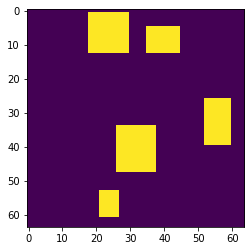

In [25]:
plt.imshow(env.state)

In [26]:
import cv2

In [40]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
s = cv2.dilate(env.state, kernel)

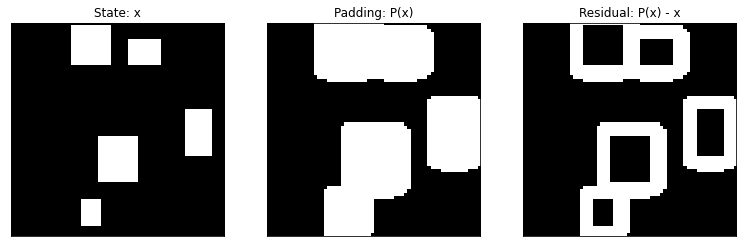

In [156]:
plt.figure(figsize=(13, 10))

ax = plt.subplot(1, 3, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("State: x")
ax.imshow(env.state, cmap='gray')

ax = plt.subplot(1, 3, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Padding: P(x)")
ax.imshow(s, cmap='gray')

ax = plt.subplot(1, 3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Residual: P(x) - x")
ax.imshow(s - env.state, cmap='gray')

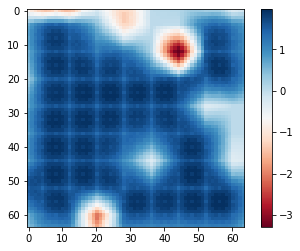

In [106]:
block1 = np.array([0.1, 0.1])
action, q1 = get_action(env, FCQ, state, block1, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q1[0], cmap='RdBu')
plt.colorbar()

plt.show()

In [43]:
(s - env.state).sum()

1070.0

<Figure size 720x720 with 0 Axes>

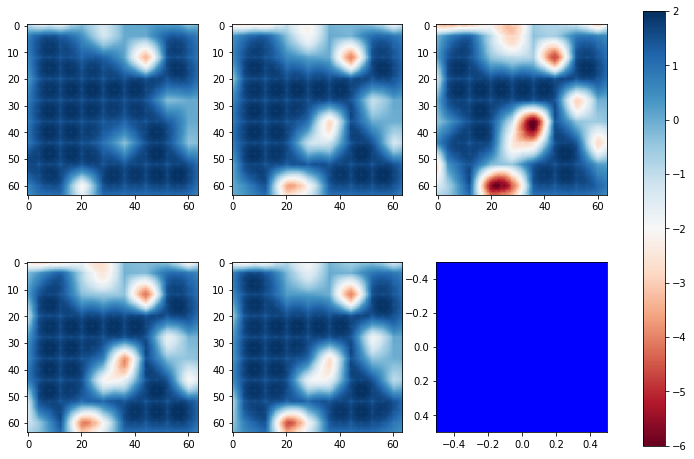

In [154]:
plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(2, 3, figsize=(13,8))
fig.set_figure((20, 10))

block1 = np.array([0.1, 0.1])
action, q1 = get_action(env, FCQ, state, block1, epsilon=0.0, pre_action=None, with_q=True)
axes[0,0].imshow(q1[0], cmap='RdBu', vmin=-6, vmax=2)

block2 = np.array([0.2, 0.2])
action, q2 = get_action(env, FCQ, state, block2, epsilon=0.0, pre_action=None, with_q=True)
axes[0,1].imshow(q2[0], cmap='RdBu', vmin=-6, vmax=2)

block3 = np.array([0.3, 0.3])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
axes[0,2].imshow(q3[0], cmap='RdBu', vmin=-6, vmax=2)

block4 = np.array([0.3, 0.1])
action, q4 = get_action(env, FCQ, state, block4, epsilon=0.0, pre_action=None, with_q=True)
axes[1,0].imshow(q4[0], cmap='RdBu', vmin=-6, vmax=2)

block5 = np.array([0.1, 0.3])
action, q5 = get_action(env, FCQ, state, block5, epsilon=0.0, pre_action=None, with_q=True)
im = axes[1,1].imshow(q5[0], cmap='RdBu', vmin=-6, vmax=2)

axes[1,2].imshow(np.zeros([1, 1]))

fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

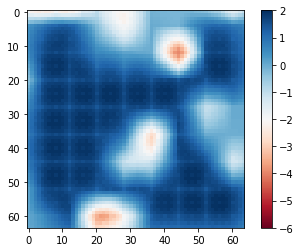

In [117]:
block2 = np.array([0.2, 0.2])
action, q2 = get_action(env, FCQ, state, block2, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q2[0], cmap='RdBu', vmin=-6, vmax=2)
plt.colorbar()
plt.show()

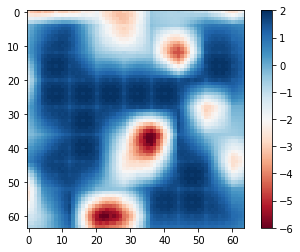

In [118]:
block3 = np.array([0.3, 0.3])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q3[0], cmap='RdBu', vmin=-6, vmax=2)
plt.colorbar()
plt.show()

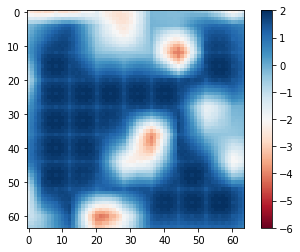

In [119]:
block3 = np.array([0.3, 0.1])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q3[0], cmap='RdBu', vmin=-6, vmax=2)
plt.colorbar()
plt.show()

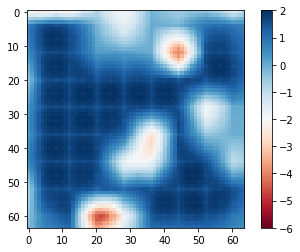

In [120]:
block3 = np.array([0.1, 0.3])
action, q3 = get_action(env, FCQ, state, block3, epsilon=0.0, pre_action=None, with_q=True)
plt.imshow(q3[0], cmap='RdBu', vmin=-6, vmax=2)
plt.colorbar()
plt.show()